In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import warnings
import os

if os.name == 'nt':
    print("This is a Windows environment.")
    rc('font', family='Malgun Gothic')
elif os.name == 'posix':
    print("This is a Mac or Linux environment.")
    rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings("ignore", category=UserWarning)

This is a Mac or Linux environment.


In [35]:
raw_pop = pd.read_excel('./data/자치구별+고령인구(추계인구)_20241019165325.xlsx')
raw_pop.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2
0,자치구별(1),자치구별(2),고령인구,고령인구,고령인구
1,자치구별(1),자치구별(2),소계,남자,여자
2,합계,소계,1691853,749118,942735
3,NaN,종로구,27187,11986,15201
4,NaN,중구,24374,10637,13737


In [44]:
pop = raw_pop.drop(index=[0, 1, 2], columns=['자치구별(1)'])
pop.columns = ["시군구", "노령인구", "노령인구_남자", "노령인구_여자"]
pop.reset_index(drop=True, inplace=True)

In [37]:
raw_market = pd.read_csv('./data/소상공인시장진흥공단_전통시장현황_20240719.csv', encoding='cp949')
raw_market.head()

,시장코드,시장명,시장 유형,지번주소,도로명주소,시도,시군구,아케이드 보유 여부,엘리베이터_에스컬레이터_보유여부,고객지원센터 보유 여부,...,쇼핑카트_보유여부,외국인 안내센터_보유여부,고객동선통로_보유여부,방송센터_보유여부,문화교실_보유여부,공동물류창고_보유여부,시장전용 고객주차장_보유여부,교육장_보유여부,회의실_보유여부,자동심장충격기_보유여부
0,b31370001,설악눈메골시장,전통시장,경기도 가평군 설악면 신천리 413-14,경기도 가평군 설악면 신천중앙로 104-1,경기도,가평군,N,N,N,...,N,N,N,N,N,N,Y,Y,Y,N
1,a31370001,가평잣고을시장,전통시장,경기도 가평군 읍내리 405,경기도 가평군 가평읍 장터2길12 204호,경기도,가평군,Y,N,Y,...,N,N,Y,Y,N,Y,Y,Y,Y,N
2,a31370007,청평여울시장,전통시장,경기도 가평군 청평면 청평리 81-2,경기도 가평군 청평면 시장중앙로19,경기도,가평군,Y,Y,N,...,N,N,N,N,N,N,Y,N,Y,N
3,a31100001,원당시장,전통시장,경기도 고양시 덕양구 성사동 697-14,경기도 고양시 덕양구 호국로 790번길 17,경기도,고양시,Y,N,Y,...,N,N,Y,Y,N,N,Y,Y,Y,Y
4,a31101001,능곡시장,전통시장,경기도 고양시 덕양구 토당동 347,경기도 고양시 덕양구 능곡로 12의 9,경기도,고양시,N,N,Y,...,Y,N,Y,Y,N,Y,Y,Y,Y,Y


In [38]:
market = raw_market[raw_market['시도'] == '서울특별시']

In [39]:
market = market['시군구'].value_counts().reset_index().rename(columns={'count' : '시장개수'})
market.head()

,시군구,시장개수
0,중구,25
1,동대문구,18
2,관악구,13
3,중랑구,12
4,강서구,9


In [40]:
raw_park = pd.read_excel('./data/공원_20241218013757.xlsx')
raw_park.head()

,자치구별(1),자치구별(2),공원수 (개소),(중복),면적 (천㎡),공원수 (개소).1,(중복).1,면적 (천㎡).1,공원수 (개소).2,(중복).2,...,면적 (천㎡).10,공원수 (개소).11,면적 (천㎡).11,공원수 (개소).12,면적 (천㎡).12,공원수 (개소).13,면적 (천㎡).13,공원수 (개소).14,(중복).5,면적 (천㎡).14
0,합계,소계,2984,57,173076.0,1,5,37517,2303,49,...,509,14,227.2,2,51.4,9,24.4,680,3,16250.4
1,NaN,종로구,106,5,11434.6,-,1,5030,69,4,...,113,-,-,-,-,-,-,37,-,168
2,NaN,중구,72,5,3204.7,-,-,-,56,5,...,34.4,-,-,-,-,-,-,16,-,88
3,NaN,용산구,107,4,1773.8,-,-,-,68,4,...,17.5,-,-,-,-,2,3.5,39,-,1016.4
4,NaN,성동구,105,1,3085.7,-,-,-,65,1,...,-,-,-,-,-,3,8.8,40,-,1854.7


In [41]:
park = raw_park[['자치구별(2)', '공원수 (개소)']]
park.rename(columns={'자치구별(2)' : '시군구', '공원수 (개소)' : '공원수'}, inplace=True)
park.drop([0,26], inplace=True)
park = park.reset_index(drop=True)
park.head()

/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_19410/3145944234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park.rename(columns={'자치구별(2)' : '시군구', '공원수 (개소)' : '공원수'}, inplace=True)
/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_19410/3145944234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park.drop([0,26], inplace=True)


,시군구,공원수
0,종로구,106
1,중구,72
2,용산구,107
3,성동구,105
4,광진구,68


In [42]:
culture = park.merge(right=market, right_on='시군구', left_on='시군구')
culture.head()

,시군구,공원수,시장개수
0,종로구,106,9
1,중구,72,25
2,용산구,107,6
3,성동구,105,4
4,광진구,68,7


In [45]:
result_culture = culture.merge(right=pop, right_on='시군구', left_on='시군구')
result_culture.head()

,시군구,공원수,시장개수,노령인구,노령인구_남자,노령인구_여자
0,종로구,106,9,27187,11986,15201
1,중구,72,25,24374,10637,13737
2,용산구,107,6,37740,16395,21345
3,성동구,105,4,47907,21034,26873
4,광진구,68,7,55697,24952,30745


In [46]:
result_culture = result_culture.drop(columns=['노령인구_남자', '노령인구_여자'])
result_culture.head()

,시군구,공원수,시장개수,노령인구
0,종로구,106,9,27187
1,중구,72,25,24374
2,용산구,107,6,37740
3,성동구,105,4,47907
4,광진구,68,7,55697


In [47]:
result_culture['문화시설개수'] = result_culture['공원수'] + result_culture['시장개수']
result_culture['기준개수'] = result_culture['문화시설개수'] / result_culture['노령인구'] * 10000
result_culture.head()

,시군구,공원수,시장개수,노령인구,문화시설개수,기준개수
0,종로구,106,9,27187,115,42.299628
1,중구,72,25,24374,97,39.796504
2,용산구,107,6,37740,113,29.941706
3,성동구,105,4,47907,109,22.752416
4,광진구,68,7,55697,75,13.465716


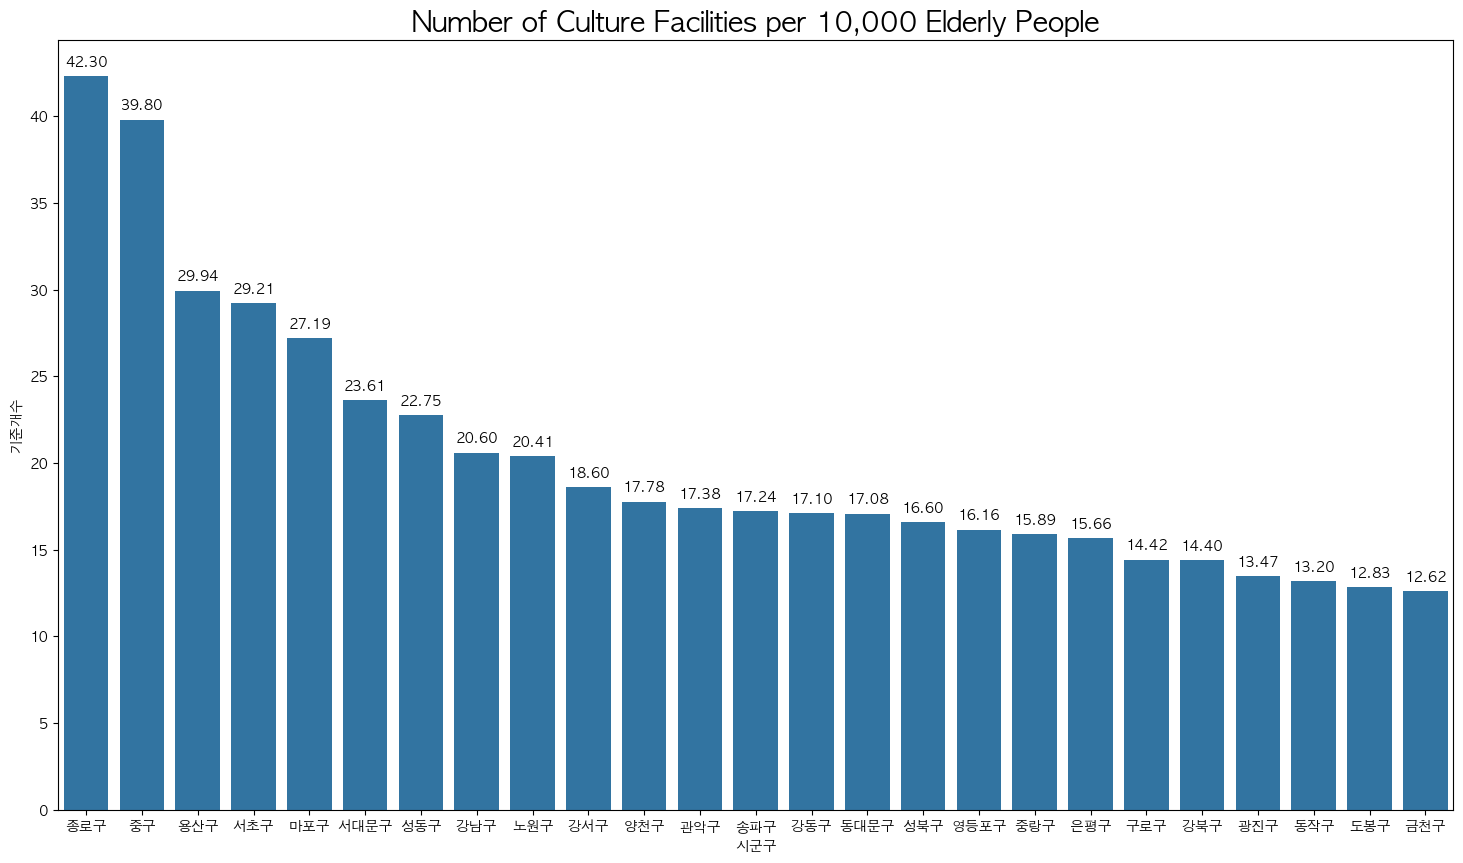

In [50]:
culture_sorted = result_culture.sort_values(by='기준개수', ascending=False)

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=culture_sorted, x='시군구', y='기준개수')
plt.title("Number of Culture Facilities per 10,000 Elderly People", fontdict={'fontsize' : 20})
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.show()

* 종로구, 중구, 용산구, 서초구, 마포구 순